# 00 - Clustering

In [1]:
import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_blobs
import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

From the documentation for k-means in scikit: 

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares.

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

$$\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$$

K-means stores $k$ centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. K-Means finds the best centroids by alternating between (1) assigning data points to clusters based on the current centroids (2) chosing centroids (points which are the center of a cluster) based on the current assignment of data points to clusters.

In [2]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

Lets create a Data Set that has some data points aranged so that they form two distinct blobs. 

In [3]:
n_samples = 1500
random_state = 12
n_features = 14
X, y = make_blobs(n_samples=n_samples, n_features=n_features, random_state=random_state)
plt.scatter(X[:, 0], X[:, 1])

The K-Means algorithm should be able to group the observations into two groups that form our clusters.

In [4]:
X.shape

(1500, 14)

In [5]:
kmeans = KMeans(n_clusters=2, random_state=1).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans)

In [6]:
kmeans.shape

(1500,)

Lets see this in action in areal-world example. We will use the Risk Analysis Data Set for extending Credit Loands available at:https://www.kaggle.com/atulmittal199174/credit-risk-analysis-for-extending-bank-loans.  This data set containts the following columns:

- This data set
- Age of the Customers
- Education Level
- Work Experience
- Address of the Customer
- Yearly Income of the customer
- Debt to Income Ratio
- Credit to Debt ratio
- Other debts
- Customer defaulted in the past 


In [7]:
raw_df = pd.read_csv('bankloans.csv')
raw_df

age  ed  employ  address  income  debtinc   creddebt   othdebt  default
0      41   3      17       12     176      9.3  11.359392  5.008608      1.0
1      27   1      10        6      31     17.3   1.362202  4.000798      0.0
2      40   1      15       14      55      5.5   0.856075  2.168925      0.0
3      41   1      15       14     120      2.9   2.658720  0.821280      0.0
4      24   2       2        0      28     17.3   1.787436  3.056564      1.0
...   ...  ..     ...      ...     ...      ...        ...       ...      ...
1145   34   1      12       15      32      2.7   0.239328  0.624672      NaN
1146   32   2      12       11     116      5.7   4.026708  2.585292      NaN
1147   48   1      13       11      38     10.8   0.722304  3.381696      NaN
1148   35   2       1       11      24      7.8   0.417456  1.454544      NaN
1149   37   1      20       13      41     12.9   0.899130  4.389870      NaN

[1150 rows x 9 columns]

In [8]:
raw_df.pop('default')

0       1.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
1145    NaN
1146    NaN
1147    NaN
1148    NaN
1149    NaN
Name: default, Length: 1150, dtype: float64

In [9]:
var1 = 'income'
var2 = 'othdebt'

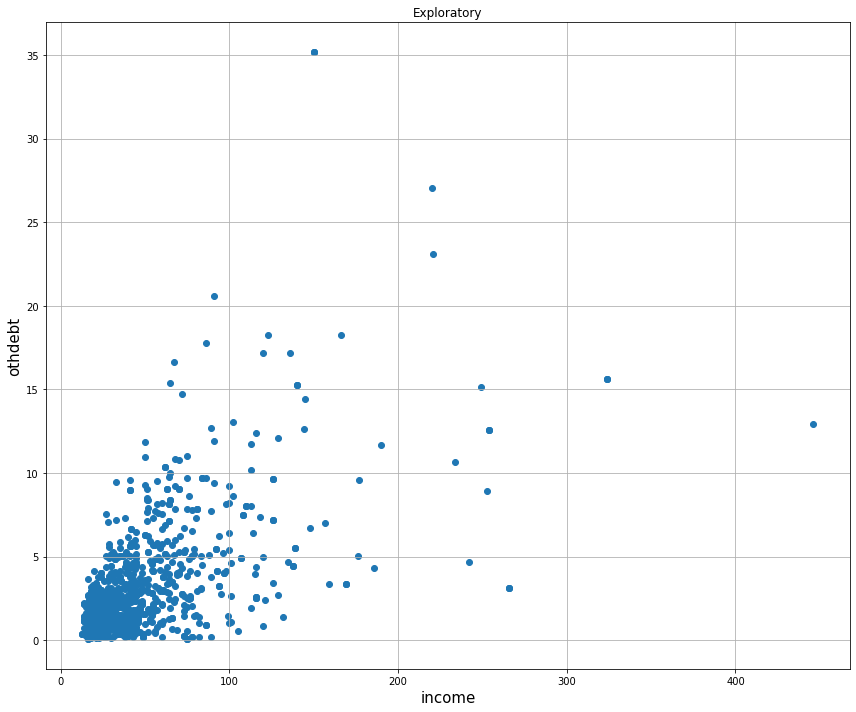

In [10]:
X = np.array(raw_df[var1]).reshape(-1,1)
Y = np.array(raw_df[var2]).reshape(-1,1)

fig, ax = plt.subplots()
ax.scatter(X, Y)
ax.set_xlabel(var1, fontsize=15)
ax.set_ylabel(var2, fontsize=15)
ax.set_title("Exploratory")
ax.grid(True)
fig.tight_layout()
plt.show()

In [11]:
x = np.array(raw_df[[var1, var2]]).reshape(-1,2)

In [12]:
random_state = 10
y_pred = KMeans(n_clusters=4, random_state=random_state).fit_predict(x)

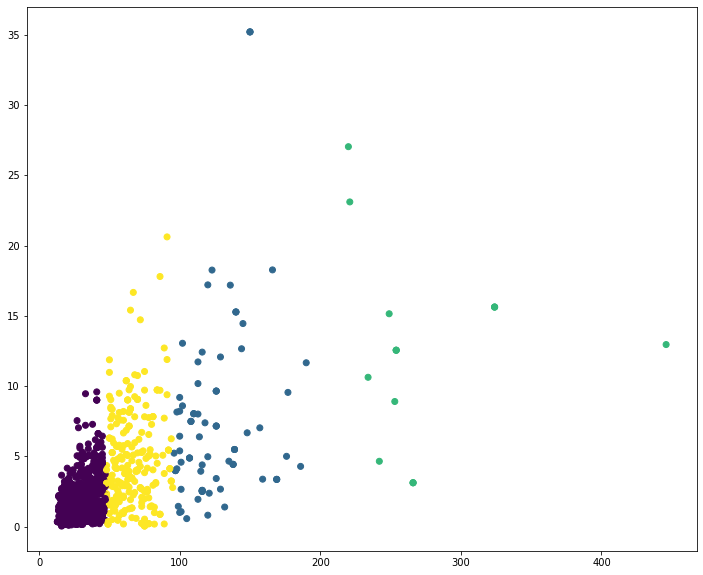

In [13]:
plt.scatter(raw_df[var1], raw_df[var2], c=y_pred)

There are other clustering algorithms.  See https://scikit-learn.org/stable/modules/clustering.html  for a complete list.  Each has its own use case:

|Method name | Usecase|
|------------|--------|
|K-Means | General-purpose, even cluster size, flat geometry, not too many clusters, inductive|
|Affinity propagation | Many clusters, uneven cluster size, non-flat geometry, inductive|
|Mean-shift | Many clusters, uneven cluster size, non-flat geometry, inductive|
|Spectral clustering | Few clusters, even cluster size, non-flat geometry, transductive|
|Ward hierarchical clustering | Many clusters, possibly connectivity constraints, transductive|
|Agglomerative clustering | Many clusters, possibly connectivity constraints, non Euclidean distances, transductive|
|DBSCAN | Non-flat geometry, uneven cluster sizes, transductive|
|OPTICS | Non-flat geometry, uneven cluster sizes, variable cluster density, transductive|
|Gaussian mixtures | Flat geometry, good for density estimation, inductive|
|BIRCH | Large dataset, outlier removal, data reduction, inductive|

Each algorithm has a different logic. For example, DBSCAN will generate the number of clusters atomatically and we will tell it the maximum distance between two samples for one to be considered as in the neighborhood of the other.

In [14]:
clustering2 = DBSCAN(eps=7).fit(X)
plt.scatter(raw_df[var1], raw_df[var2], c=clustering2.labels_)
print("Number of clusters: ",len(set(clustering2.labels_)))

Number of clusters:  4
